<a href="https://colab.research.google.com/github/philipoladimeji/ITNPBD4-Portfolio/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration

In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 11.0 MB/s eta 0:00:00


In [3]:
# For proper analysing it will be required to import some essential machine learning libraries to enable efficient data handling, data
#visualization and analysis without writing the required code from the beginning. Libraries like pandas which is use to analyse, manipulte and
#clean data using dataframe. numpy is use to support numerical and mathematical operations.
# OS is use to utilise and communicate with the operating system, aids in managing environment variables, directories, and file paths. CSV enables
# reading and writing of files. matplotlib.pyplot is for creating charts and graphs for visualisations. seaborn is built on matplotlib for improved
# colour schemes and styles.

#Importing pandas library
import pandas as pd
#Importing numpy library for numerical operations
import numpy as np
#Importing os to utilise and communicate with operating system and aids in managing directories and file paths
import os
#Importing csv library to enable reading and writing of files
import csv
#Importing matplotlib.pyplot to customise and create visualisations from data
import matplotlib.pyplot as plt
#Importing season to make visualisation informative and improve colour schmes and styles
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
import warnings
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
#Getting the file path and saving it in the working directory
from google.colab import files
uploaded = files.upload

In [5]:
df = pd.read_csv("/content/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
df.shape

(119390, 32)

Data Validation

In [12]:
#The double quotation checks for empty strings in the given data frame. It replaces with nan (not a number) which is pandas method of representing
#missing values. The inplace=True as seen implies the adjustment is done directly in the dataframe. The isnull finds the missing values for an
#array lookalike object in the cell and the dot sum count the number of missing value for each columns if there is

# Checking for missing value in data and print the total number of missing values on each
df.replace('', np.nan, inplace=True)

#Output the number of missing values on each column if it's available
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


/tmp/ipython-input-2935668792.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_values.index, y=missing_values.values, palette="YlOrRd")


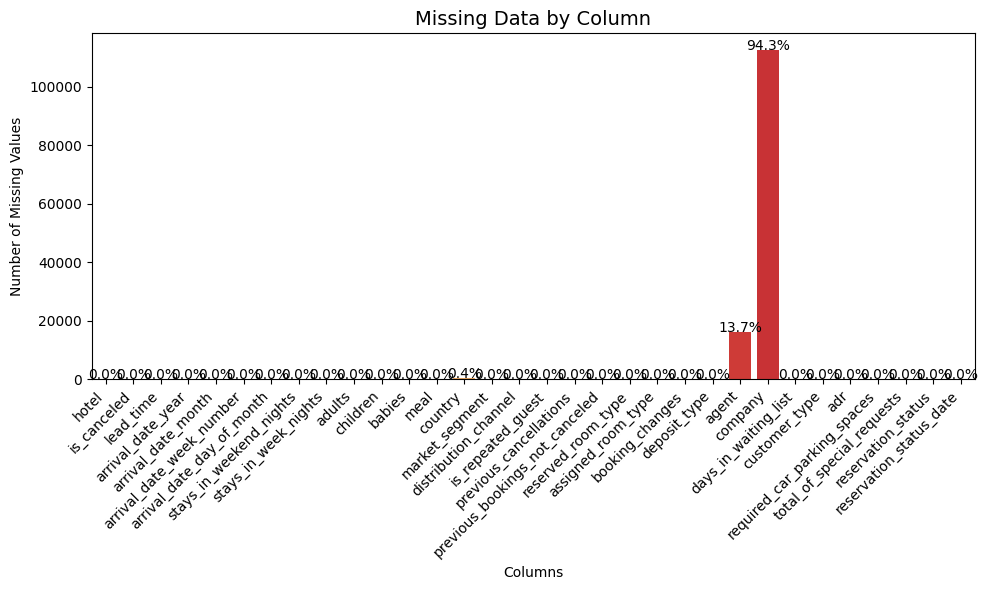

In [13]:
#Looping through the column and count the missing values
missing_values = df.isnull().sum()
total_rows = len(df)

#print the plot in a bar chart form to display the missing values in each columns
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_values.index, y=missing_values.values, palette="YlOrRd")

#Add percentages on each bar
for i, value in enumerate(missing_values.values):
    percent = (value / total_rows) * 100
    ax.text(i, value + 0.5, f"{percent:.1f}%", ha='center', fontsize=10)

#The rotation and the label words makes the plot to be easy to understand
plt.title("Missing Data by Column", fontsize=14)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [14]:
df = df.drop(['company', 'agent'], axis=1)
df = df.dropna(subset=['country', 'children', 'arrival_date_week_number'], axis=0)
df = df.reset_index(drop=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
df['children'] = df['children'].astype(int)
df['children'].dtype

dtype('int64')

In [16]:
#Output the number of missing values on each column if it's available
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Data Visualizations

In [17]:
country_freq = df['country'].value_counts().to_frame()
country_freq.columns = ['count']
fig = px.choropleth(country_freq, color='count',
                    locations=country_freq.index,
                    hover_name=country_freq.index,
                    color_continuous_scale=px.colors.sequential.Teal)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Number of Records by Countries',
                  title_x=0.5, title_font=dict(size=22))  #Location and the font size of the main title
fig.show()